### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
# prompt: Con DataFrame tienda: tienda1

# Display the first few rows of the 'tienda' DataFrame.
tienda.head()


In [ ]:
tienda2.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611
3,Cama king,Muebles,906200.0,46400.0,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
4,Silla de oficina,Muebles,397800.0,19400.0,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175


In [ ]:
tienda3.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Secadora de ropa,Electrodomésticos,1285100.0,66600.0,17/12/2021,Camila Rivera,Santa Marta,4,Tarjeta de crédito,4,11.24079,-74.19904
1,Mesa de noche,Muebles,290100.0,13600.0,10/02/2021,Maria Alfonso,Cali,3,Tarjeta de crédito,1,3.43722,-76.52250
2,Guitarra acústica,Instrumentos musicales,303500.0,17400.0,22/01/2023,Lucas Olivera,Bogotá,5,Tarjeta de crédito,3,4.60971,-74.08175
3,Balón de voleibol,Deportes y diversión,58800.0,3300.0,22/03/2022,Pedro Gomez,Barranquilla,4,Tarjeta de crédito,6,10.96854,-74.78132
4,Armario,Muebles,521100.0,25900.0,12/01/2022,Blanca Ramirez,Bogotá,1,Tarjeta de crédito,1,4.60971,-74.08175


In [ ]:
tienda4.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Lavavajillas,Electrodomésticos,1084800.0,56000.0,11/11/2022,Rafael Acosta,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175
1,Cama box,Muebles,473800.0,25400.0,03/01/2020,Izabela de León,Cúcuta,5,Tarjeta de crédito,2,7.89391,-72.50782
2,Balón de baloncesto,Deportes y diversión,23700.0,0.0,25/12/2022,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
3,Modelado predictivo,Libros,57700.0,1300.0,23/11/2021,Lucas Olivera,Medellín,3,Nequi,1,6.25184,-75.56359
4,Auriculares,Electrónicos,138900.0,5600.0,25/04/2022,Blanca Ramirez,Bogotá,4,Tarjeta de crédito,7,4.60971,-74.08175


# 1. FECHAS ANALISIS BASE DATOS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

urls = [url1, url2, url3, url4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Lista para almacenar los resultados
fechas_info = []

for i, url in enumerate(urls):
    df = pd.read_csv(url)
    df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], dayfirst=True)
    fecha_inicio = df['Fecha de Compra'].min().date()
    fecha_fin = df['Fecha de Compra'].max().date()
    total_dias = (df['Fecha de Compra'].max() - df['Fecha de Compra'].min()).days
    fechas_info.append({
        'Tienda': tiendas[i],
        'Fecha Inicio': fecha_inicio,
        'Fecha Término': fecha_fin,
        'N° de Días': total_dias
    })

# Crear el DataFrame final
df_fechas = pd.DataFrame(fechas_info)
print(df_fechas.to_markdown(index=False))

| Tienda   | Fecha Inicio   | Fecha Término   |   N° de Días |
|:---------|:---------------|:----------------|-------------:|
| Tienda 1 | 2020-01-01     | 2023-03-31      |         1185 |
| Tienda 2 | 2020-01-01     | 2023-03-31      |         1185 |
| Tienda 3 | 2020-01-01     | 2023-03-31      |         1185 |
| Tienda 4 | 2020-01-01     | 2023-03-30      |         1184 |


#2. FACTURACION POR TIENDAS



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

Venta_total_tienda1 = sum(tienda1["Precio"])
Venta_total_tienda2 = sum(tienda2["Precio"])
Venta_total_tienda3 = sum(tienda3["Precio"])
Venta_total_tienda4 = sum(tienda4["Precio"])


print(f"Venta total Tienda 1: {Venta_total_tienda1:,.0f}")
print(f"Venta tota  Tienda 2: {Venta_total_tienda2:,.0f}")
print(f"Venta total  Tienda 3: {Venta_total_tienda3:,.0f}")
print(f"Venta total  Tienda 4: {Venta_total_tienda4:,.0f}")


Venta total Tienda 1: 1,150,880,400
Venta tota  Tienda 2: 1,116,343,500
Venta total  Tienda 3: 1,098,019,600
Venta total  Tienda 4: 1,038,375,700


vamos a graficar las ventas por tienda

Venta total: 1,150,880,400
Venta total: 1,116,343,500
Venta total: 1,098,019,600
Venta total: 1,038,375,700


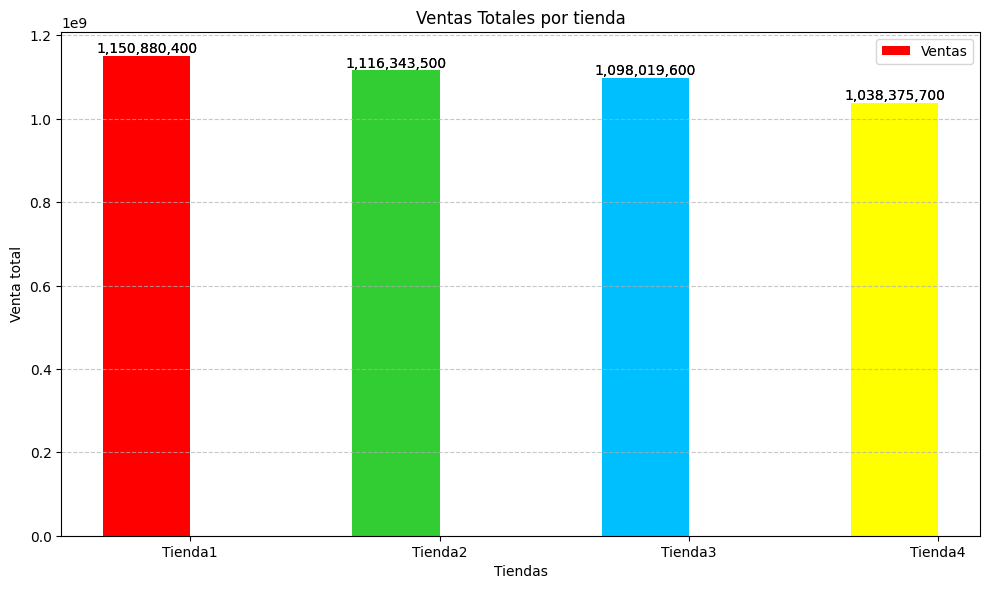

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculamos los valores
Venta_total_tienda1 = sum(tienda1["Precio"])
Venta_total_tienda2 = sum(tienda2["Precio"])
Venta_total_tienda3 = sum(tienda3["Precio"])
Venta_total_tienda4 = sum(tienda4["Precio"])

# Imprimimos los valores
print(f"Venta total: {Venta_total_tienda1:,.0f}")
print(f"Venta total: {Venta_total_tienda2:,.0f}")
print(f"Venta total: {Venta_total_tienda3:,.0f}")
print(f"Venta total: {Venta_total_tienda4:,.0f}")

# Creamos el gráfico de barras(VARIABLES)
tiendas = ['Tienda1', 'Tienda2','Tienda3','Tienda4']
valores_tiendas = [Venta_total_tienda1, Venta_total_tienda2, Venta_total_tienda3, Venta_total_tienda4]
colores = ['#FF0000','#32CD32','#00BFFF','#FFFF00']  #VER TABLA COLORES https://htmlcolorcodes.com/es/nombres-de-los-colores/

bar_width = 0.35       #ANCHO BARRAS
index = np.arange(len(tiendas)) # cada tienda tendrá una barra ubicada en posiciones 0, 1, 2, ..., separadas uniformemente.

plt.figure(figsize=(10, 6))

# Crear barras para VENTAS
bars1 = plt.bar(index, valores_tiendas, bar_width, label='Ventas', color= colores)#SE INDICA

# Personalización del gráfico
plt.title('Comparación Ventas Totales Tiendas')
plt.xlabel('Tiendas')
plt.ylabel('Valores')
plt.xticks(index + bar_width/2, tiendas) #Alinear etiquetas entre grupos de barras.
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir etiquetas con los valores
for bars in [bars1]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:,.0f}',
                ha='center', va='bottom')

plt.tight_layout()

# Añadimos formato a los ejes y título
plt.title('Ventas Totales por tienda')
plt.ylabel('Venta total')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostramos los valores en las barras
for i, valor in enumerate(valores_tiendas):
    plt.text(i, valor, f"{valor:,.0f}", ha='center', va='bottom')

plt.show()

# 3. VENTAS POR CATEGORIA

'Ventas_por_categoria: Unidades'

,Tienda 1,Tienda 2,Tienda 3,Tienda 4,Total,Porcentaje
Categoría del Producto,,,,,,
Muebles,465,442,499,480,1886,20
Electrónicos,448,422,451,451,1772,19
Juguetes,324,313,315,338,1290,14
Electrodomésticos,312,305,278,254,1149,12
Deportes y diversión,284,275,277,277,1113,12
Instrumentos musicales,182,224,177,170,753,8
Libros,173,197,185,187,742,8
Artículos para el hogar,171,181,177,201,730,8


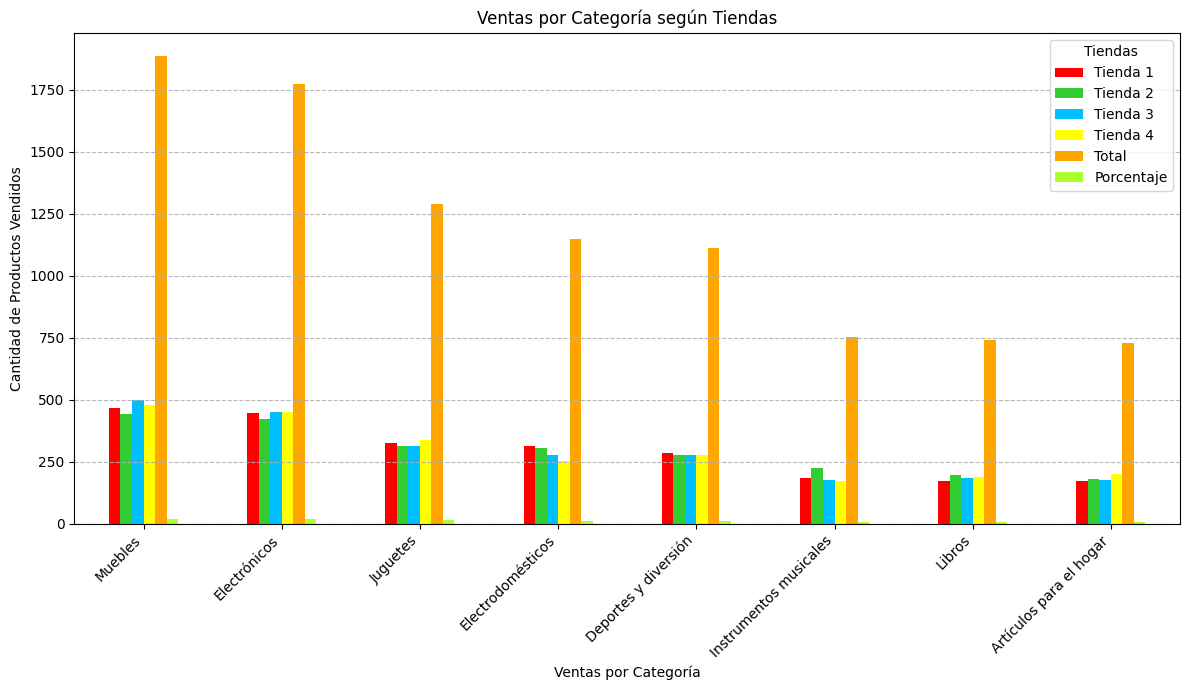

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# 1. Configurar pandas para alineación automática (válido en Colab)
pd.set_option('display.colheader_justify', 'left')  # Encabezados alineados a la izquierda
pd.set_option('display.float_format', '{:,.0f}'.format)  # Formato numérico sin decimales

# 2. Crear Diccionario inicial
ventas_por_categoria = {}

# 3. Itera sobre un diccionario mapeando nombres de tiendas a sus DataFrames
for nombre, df in {'Tienda 1': tienda1, 'Tienda 2': tienda2, 'Tienda 3': tienda3, 'Tienda 4': tienda4}.items():
   #contar las ventas por categoría en cada tienda
    conteo = df['Categoría del Producto'].value_counts()
    ventas_por_categoria[nombre]=conteo

# 4.Contar Venta Productos Categoría por Tienda
conteo_tienda1 = tienda1['Categoría del Producto'].value_counts()
conteo_tienda2 = tienda2['Categoría del Producto'].value_counts()
conteo_tienda3 = tienda3['Categoría del Producto'].value_counts()
conteo_tienda4 = tienda4['Categoría del Producto'].value_counts()

# 5. Agrupar conteos en un solo DataFrame
ventas_por_categoria = pd.DataFrame({
    'Tienda 1':conteo_tienda1,
    'Tienda 2': conteo_tienda2,
    'Tienda 3': conteo_tienda3,
    'Tienda 4': conteo_tienda4
}).fillna(0).astype(int)      # Rellenar con NaN para valores 0 y convertir a int

# Agregar columna de totales por categoría
ventas_por_categoria['Total'] = ventas_por_categoria.sum(axis=1)

# Agregar columna de porcentaje por categoría respecto al total general
total_general = ventas_por_categoria['Total'].sum()
ventas_por_categoria['Porcentaje'] = (ventas_por_categoria['Total'] / total_general * 100).round(2)

# Ordenar el DataFrame de mayor a menor porcentaje
ventas_por_categoria = ventas_por_categoria.sort_values('Porcentaje', ascending=False)

# Mostrar tabla
display(f"Ventas_por_categoria: Unidades")
display(ventas_por_categoria)


# 6. Graficar los datos usando .plot() del DataFrame
colores = ['#FF0000','#32CD32','#00BFFF','#FFFF00','#FFA500','#ADFF2F','#DA70D6','#808000']  #VER TABLA COLORES https://htmlcolorcodes.com/es/nombres-de-los-colores/

# Transponer el DataFrame para que las categorías sean las columnas
ventas_por_categoria = ventas_por_categoria # Si agrego al final de ventas_por_categoria .T = transponer los ejes

# Graficar usando un gráfico de barras apiladas
ventas_por_categoria.plot(kind='bar', figsize=(12, 7), color=colores)

# Personalizar el gráfico
plt.title('Ventas por Categoría según Tiendas')
plt.xlabel('Ventas por Categoría')

# Centrar las etiquetas en el eje X
plt.xticks(rotation=45, ha= 'right')  # Alineación horizontal etiquetas en el centro

plt.ylabel('Cantidad de Productos Vendidos')
plt.legend(title='Tiendas')
plt.grid(axis='y', linestyle='--', alpha=0.9)

plt.tight_layout()
plt.show()


fzhzfdhzdh

'Ventas_por_categoria: Unidades'

,Tienda 1,Tienda 2,Tienda 3,Tienda 4,Total,Porcentaje
Categoría del Producto,,,,,,
Muebles,465,442,499,480,1886,20
Electrónicos,448,422,451,451,1772,19
Juguetes,324,313,315,338,1290,14
Electrodomésticos,312,305,278,254,1149,12
Deportes y diversión,284,275,277,277,1113,12
Instrumentos musicales,182,224,177,170,753,8
Libros,173,197,185,187,742,8
Artículos para el hogar,171,181,177,201,730,8


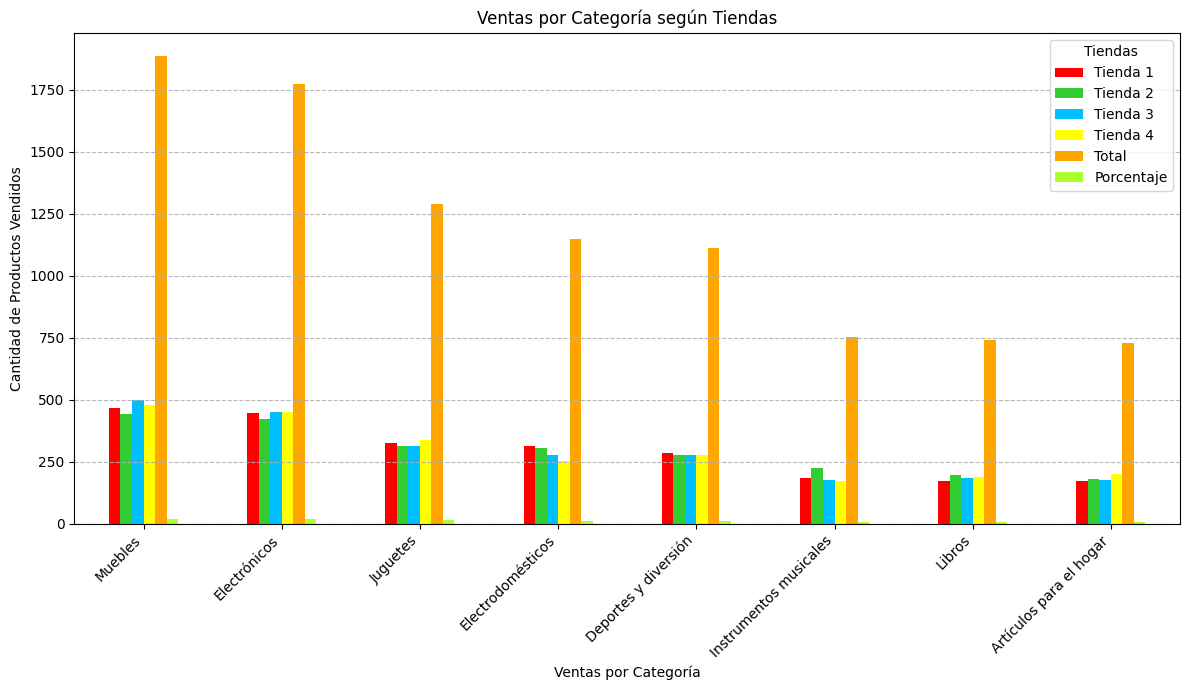

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# 1. Configurar pandas para alineación automática (válido en Colab)
pd.set_option('display.colheader_justify', 'left')  # Encabezados alineados a la izquierda
pd.set_option('display.float_format', '{:,.0f}'.format)  # Formato numérico sin decimales

# 2. Crear Diccionario inicial
ventas_por_categoria = {}

# 3. Itera sobre un diccionario mapeando nombres de tiendas a sus DataFrames
for nombre, df in {'Tienda 1': tienda1, 'Tienda 2': tienda2, 'Tienda 3': tienda3, 'Tienda 4': tienda4}.items():
   #contar las ventas por categoría en cada tienda
    conteo = df['Categoría del Producto'].value_counts()
    ventas_por_categoria[nombre]=conteo

# 4.Contar Venta Productos Categoría por Tienda
conteo_tienda1 = tienda1['Categoría del Producto'].value_counts()
conteo_tienda2 = tienda2['Categoría del Producto'].value_counts()
conteo_tienda3 = tienda3['Categoría del Producto'].value_counts()
conteo_tienda4 = tienda4['Categoría del Producto'].value_counts()

# 5. Agrupar conteos en un solo DataFrame
ventas_por_categoria = pd.DataFrame({
    'Tienda 1':conteo_tienda1,
    'Tienda 2': conteo_tienda2,
    'Tienda 3': conteo_tienda3,
    'Tienda 4': conteo_tienda4
}).fillna(0).astype(int)      # Rellenar con NaN para valores 0 y convertir a int

# Agregar columna de totales por categoría
ventas_por_categoria['Total'] = ventas_por_categoria.sum(axis=1)

# Agregar columna de porcentaje por categoría respecto al total general
total_general = ventas_por_categoria['Total'].sum()
ventas_por_categoria['Porcentaje'] = (ventas_por_categoria['Total'] / total_general * 100).round(2)

# Ordenar el DataFrame de mayor a menor porcentaje
ventas_por_categoria = ventas_por_categoria.sort_values('Porcentaje', ascending=False)

# Mostrar tabla
display(f"Ventas_por_categoria: Unidades")
display(ventas_por_categoria)


# 6. Graficar los datos usando .plot() del DataFrame
colores = ['#FF0000','#32CD32','#00BFFF','#FFFF00','#FFA500','#ADFF2F','#DA70D6','#808000']  #VER TABLA COLORES https://htmlcolorcodes.com/es/nombres-de-los-colores/

# Transponer el DataFrame para que las categorías sean las columnas
ventas_por_categoria = ventas_por_categoria # Si agrego al final de ventas_por_categoria .T = transponer los ejes

# Graficar usando un gráfico de barras apiladas
ventas_por_categoria.plot(kind='bar', figsize=(12, 7), color=colores)

# Personalizar el gráfico
plt.title('Ventas por Categoría según Tiendas')
plt.xlabel('Ventas por Categoría')

# Centrar las etiquetas en el eje X
plt.xticks(rotation=45, ha= 'right')  # Alineación horizontal etiquetas en el centro

plt.ylabel('Cantidad de Productos Vendidos')
plt.legend(title='Tiendas')
plt.grid(axis='y', linestyle='--', alpha=0.9)

plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [ ]:
from urllib.request import urlopen
import csv

urls = [url, url2, url3, url4]

def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        # Decodificar los datos
        lineas = respuesta.read().decode('utf-8').splitlines()
        reader = csv.DictReader(lineas)
        for fila in reader:
            datos.append(fila)
    return datos

# Calcular la calificación promedio para cada tienda
for i, url in enumerate(urls):
    datos_tienda = leer_csv(url)

    # Variables para calcular el promedio
    suma_calificaciones = 0
    cantidad_productos = 0

    for producto in datos_tienda:
        try:
            # Intentamos con diferentes posibles nombres de columna
            if 'Calificación' in producto:
                calificacion = float(producto['Calificación'])
            elif 'Calificacion' in producto:
                calificacion = float(producto['Calificacion'])
            elif 'calificación' in producto:
                calificacion = float(producto['calificación'])
            elif 'calificacion' in producto:
                calificacion = float(producto['calificacion'])
            else:
                # Si no encontramos la columna, imprimimos las claves disponibles
                print(f"Claves disponibles en la tienda {i+1}:", producto.keys())
                raise KeyError("No se encontró la columna de calificación")

            suma_calificaciones += calificacion
            cantidad_productos += 1
        except (ValueError, KeyError) as e:
            if isinstance(e, KeyError):
                raise
            # Ignoramos valores que no se pueden convertir a float
            continue

    if cantidad_productos > 0:
        calificacion_promedio = suma_calificaciones / cantidad_productos
        print(f"Calificación promedio de la Tienda {i+1}: {calificacion_promedio:.2f}")
    else:
        print(f"No se pudieron procesar calificaciones para la Tienda {i+1}")

Calificación promedio de la Tienda 1: 3.98
Calificación promedio de la Tienda 2: 4.04
Calificación promedio de la Tienda 3: 4.05
Calificación promedio de la Tienda 4: 4.00


# 4. Productos más y menos vendidos

## VENTAS TOTALES VENDEDOR~CALIFICACIONES

           Vendedor  Suma de Precios  Calificación Promedio
3     Felipe Santos      353796000.0                   4.08
4   Izabela de León      350342400.0                   3.86
8     Maria Alfonso      349694800.0                   3.96
6     Juliana Costa      338364700.0                   3.92
10      Pedro Gomez      313350900.0                   4.04
11    Rafael Acosta      310292300.0                   4.06
5    Juan Fernandez      308562100.0                   4.03
7     Lucas Olivera      305403600.0                   3.96
2     Camila Rivera      303184200.0                   4.03
0   Beatriz Morales      302695600.0                   4.05
1    Blanca Ramirez      299586600.0                   3.99
12   Santiago Silva      293418200.0                   4.03
13  Ángel Rodriguez      291625200.0                   4.13
9   Mariana Herrera      283302600.0                   4.07


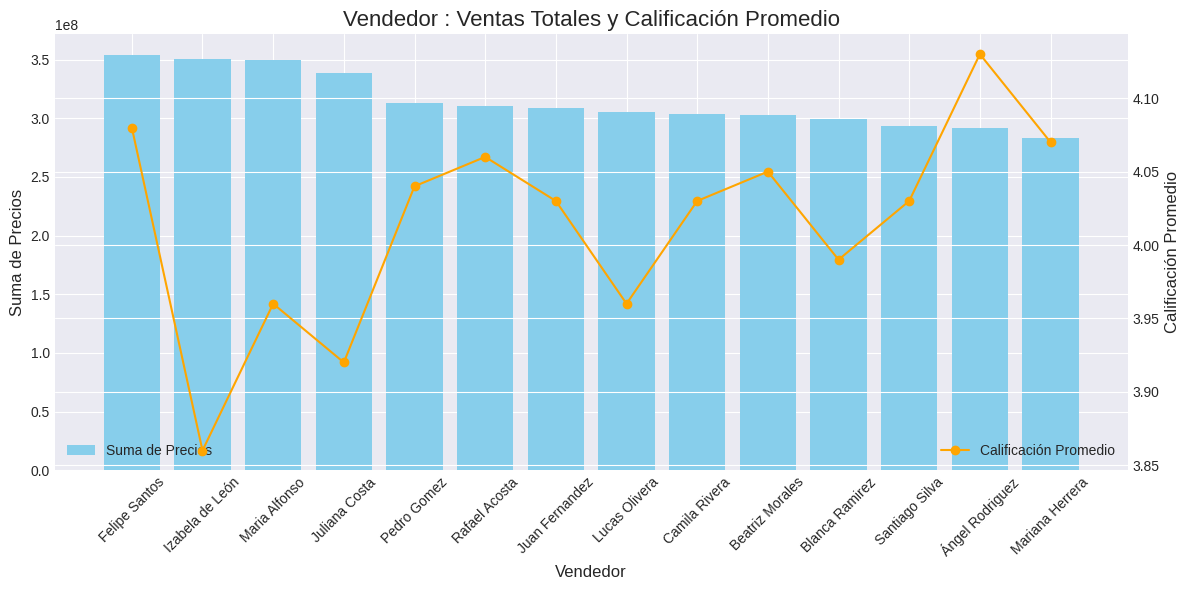

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define las URLs de los archivos CSV
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Leer los archivos CSV
tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Concatenar los datos de todas las tiendas
datos = pd.concat([tienda1, tienda2, tienda3, tienda4])

# Asegurarse de que la columna 'calificacion' sea de tipo float
datos['Calificación'] = datos['Calificación'].astype(float).round(2)

# Agrupar por vendedor y calcular la suma de precios y calificación promedio
ventas_por_vendedor = datos.groupby('Vendedor', as_index=False).agg({
    'Precio': 'sum',  # Asegúrate de que la columna se llame 'Precio'
    'Calificación': 'mean'  # Asegúrate de que la columna se llame 'Calificación'
})

# Renombrar las columnas
ventas_por_vendedor.rename(columns={
    'Precio': 'Suma de Precios',
    'Calificación': 'Calificación Promedio'
}, inplace=True)

# Redondear la columna 'Calificación Promedio' a 2 decimales
ventas_por_vendedor['Calificación Promedio'] = ventas_por_vendedor['Calificación Promedio'].round(2)

# Ordenar de mayor a menor por la suma de precios
ventas_por_vendedor = ventas_por_vendedor.sort_values(by='Suma de Precios', ascending=False)

# Mostrar el DataFrame
print(ventas_por_vendedor)

# Crear un gráfico de barras con dos colores
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de barras para la suma de precios
ax1.bar(ventas_por_vendedor['Vendedor'], ventas_por_vendedor['Suma de Precios'], color='skyblue', label='Suma de Precios')
ax1.set_ylabel('Suma de Precios', fontsize=12)
ax1.set_xlabel('Vendedor', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc='lower left')

# Crear un segundo eje Y para las calificaciones promedio
ax2 = ax1.twinx()
ax2.plot(ventas_por_vendedor['Vendedor'], ventas_por_vendedor['Calificación Promedio'], color='orange', marker='o', label='Calificación Promedio')
ax2.set_ylabel('Calificación Promedio', fontsize=12)
ax2.legend(loc='lower right')

# Título del gráfico
plt.title('Vendedor : Ventas Totales y Calificación Promedio', fontsize=16)

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
import pandas as pd

# URLs de los archivos CSV
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Diccionario con las URLs de las tiendas
tiendas = {
    'Tienda 1': url,
    'Tienda 2': url2,
    'Tienda 3': url3,
    'Tienda 4': url4
}

# Función para encontrar los 3 productos más y menos vendidos por tienda
def productos_mas_y_menos_vendidos_por_tienda(tiendas):
    resultados = []

    for nombre_tienda, url in tiendas.items():
        # Leer datos de la tienda
        df = pd.read_csv(url)

        # Contar transacciones por producto
        ventas_por_producto = df['Producto'].value_counts().reset_index()
        ventas_por_producto.columns = ['Producto', 'Total Ventas']

        # Obtener los 3 productos con más ventas
        productos_top = ventas_por_producto.head(5)

        # Obtener los 3 productos con menos ventas
        productos_bottom = ventas_por_producto.tail(5)

        # Agregar resultados al DataFrame
        for i in range(5):  # Iterar sobre los 5 productos más y menos vendidos
            resultados.append({
                'Tienda': nombre_tienda,
                'Producto Más Vendido': productos_top.iloc[i]['Producto'] if i < len(productos_top) else None,
                'Total Ventas (Más Vendido)': productos_top.iloc[i]['Total Ventas'] if i < len(productos_top) else None,
                'Producto Menos Vendido': productos_bottom.iloc[i]['Producto'] if i < len(productos_bottom) else None,
                'Total Ventas (Menos Vendido)': productos_bottom.iloc[i]['Total Ventas'] if i < len(productos_bottom) else None
            })

    return pd.DataFrame(resultados)

# Obtener y mostrar resultados
resultado_final = productos_mas_y_menos_vendidos_por_tienda(tiendas)

# Formatear la salida para mejor visualización
resultado_final = resultado_final[['Tienda', 'Producto Más Vendido','Total Ventas (Más Vendido)', 'Producto Menos Vendido',  'Total Ventas (Menos Vendido)']]

# Formatear las columnas numéricas para mostrar separador de miles:
resultado_final['Total Ventas (Más Vendido)'] = resultado_final['Total Ventas (Más Vendido)'].map('{:,.0f}'.format)
resultado_final['Total Ventas (Menos Vendido)'] = resultado_final['Total Ventas (Menos Vendido)'].map('{:,.0f}'.format)

# Aplicar estilo para centrar columnas
styled_df = resultado_final.style.set_properties(**{'text-align': 'left'})#DECIA CENTER


# Mostrar el DataFrame con estilo
styled_df .set_caption('Productos Más y Menos Vendidos por Tienda')



,Tienda,Producto Más Vendido,Total Ventas (Más Vendido),Producto Menos Vendido,Total Ventas (Menos Vendido)
0,Tienda 1,Microondas,60,Ciencia de datos con Python,39
1,Tienda 1,TV LED UHD 4K,60,Pandereta,36
2,Tienda 1,Armario,60,Olla de presión,35
3,Tienda 1,Secadora de ropa,58,Auriculares con micrófono,33
4,Tienda 1,Mesa de noche,56,Celular ABXY,33
5,Tienda 2,Iniciando en programación,65,Auriculares,37
6,Tienda 2,Microondas,62,Sillón,35
7,Tienda 2,Batería,61,Mesa de comedor,34
8,Tienda 2,Guitarra acústica,58,Impresora,34
9,Tienda 2,Pandereta,58,Juego de mesa,32


# 5. Envío promedio por tienda

In [ ]:
import pandas as pd
import numpy as np

# Define las URLs de los archivos CSV
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Leer los archivos CSV
tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Función para calcular el promedio de envíos por tienda
def calcular_envio_promedio(df, nombre_tienda):
    promedio_envio = df['Costo de envío'].mean()  # Asumiendo que la columna de envíos se llama 'Costo de envío'
    return {
        'Tienda': nombre_tienda,
        'Promedio de envío': promedio_envio
    }

# Calcular para cada tienda
resultados_envios = [
    calcular_envio_promedio(tienda, 'Tienda 1'),
    calcular_envio_promedio(tienda2, 'Tienda 2'),
    calcular_envio_promedio(tienda3, 'Tienda 3'),
    calcular_envio_promedio(tienda4, 'Tienda 4')
]

# Crear un DataFrame con los resultados de envíos
df_envios = pd.DataFrame(resultados_envios)
df_envios = df_envios.round(4)

# Aplicar estilos
df_envios_styled = df_envios.style.set_properties(
    **{'text-align': 'left'}, subset=['Tienda']
).set_properties(
    **{'text-align': 'right'}, subset=['Promedio de envío']
)

# Mostrar el DataFrame con estilos
df_envios_styled
print(df_envios.to_string(index=False))# PARA NO MOSTRAR INDEX


  Tienda  Promedio de envío
Tienda 1         26018.6096
Tienda 2         25216.2357
Tienda 3         24805.6804
Tienda 4         23459.4572


## COSTO ENVIO SEGUN LUGAR COMPRA POR TIENDA

Tienda Lugar de Compra    Tienda 1    Tienda 2    Tienda 3    Tienda 4
0              Armenia    242400.0    178100.0    206100.0     13700.0
1         Barranquilla   1778100.0   1455500.0   1959700.0   1841300.0
2               Bogotá  23434800.0  25607100.0  25371000.0  22317100.0
3          Bucaramanga    948200.0   1289800.0   1240500.0   1370500.0
4                 Cali   8158200.0   6285400.0   5815400.0   6654900.0
5            Cartagena   1199100.0   1132700.0   1829500.0   1317200.0
6               Cúcuta   2046600.0   1553100.0   1324800.0    394600.0
7              Inírida    142300.0    129800.0     75300.0     80400.0
8              Leticia    782400.0    861200.0   1035400.0    916100.0
9            Manizales    437100.0    175200.0    342400.0     68200.0
10            Medellín  15880600.0  15860900.0  13342000.0  13419100.0
11               Neiva    189100.0    216200.0    224300.0    478800.0
12               Pasto    806800.0    674700.0    360500.0    771300.0
13    

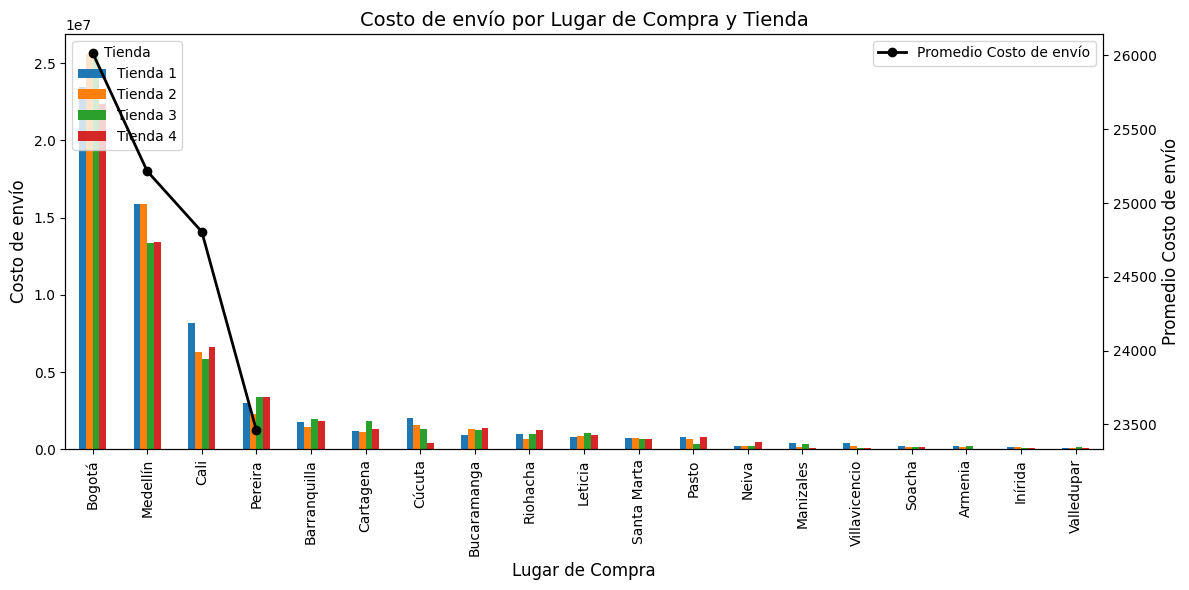

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Leer los archivos CSV desde las URLs
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Cargar los datos de cada tienda
tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Cargar los datos de cada tienda y agregar columna de tienda
tienda = pd.read_csv(url)
tienda['Tienda'] = 'Tienda 1'
tienda2 = pd.read_csv(url2)
tienda2['Tienda'] = 'Tienda 2'
tienda3 = pd.read_csv(url3)
tienda3['Tienda'] = 'Tienda 3'
tienda4 = pd.read_csv(url4)
tienda4['Tienda'] = 'Tienda 4'

# Unir todos los datos
df_all = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Agrupar por Lugar de Compra y Tienda para obtener suma de Costo de envío
df_grouped = df_all.groupby(['Lugar de Compra', 'Tienda'], as_index=False)['Costo de envío'].sum()

# Pivotear para mostrar por filas el "Lugar de Compra" y por columnas cada tienda
df_pivot = df_grouped.pivot(index='Lugar de Compra', columns='Tienda', values='Costo de envío').reset_index()

# Mostrar el DataFrame resultante
print(df_pivot)

# Función para calcular el promedio de envío por tienda
def calcular_envio_promedio(df, nombre_tienda):
    """
    Calcula el promedio del costo de envío para un DataFrame.
    - df: DataFrame de la tienda.
    - nombre_tienda: nombre de la tienda.
    Retorna un diccionario con el nombre y el promedio.
    """
    promedio_envio = df['Costo de envío'].mean()
    return {
        'Tienda': nombre_tienda,
        'Promedio de envío': promedio_envio
    }

# Calcular el promedio de envío para cada tienda
resultados_envios = [
    calcular_envio_promedio(tienda, 'Tienda 1'),
    calcular_envio_promedio(tienda2, 'Tienda 2'),
    calcular_envio_promedio(tienda3, 'Tienda 3'),
    calcular_envio_promedio(tienda4, 'Tienda 4')
]

# Crear un DataFrame con los resultados
df_envios = pd.DataFrame(resultados_envios)
df_envios = df_envios.round(4)


# Mostrar el DataFrame sin índice
print(df_envios.to_string(index=False))


# Unir los datos de todas las tiendas y agregar columna de tienda
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'
df_all = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Agrupar por Lugar de Compra y Tienda para obtener suma de Costo de envío
df_grouped = df_all.groupby(['Lugar de Compra', 'Tienda'], as_index=False)['Costo de envío'].sum()


# Pivotear para gráfico de barras
pivot_barras = df_grouped.pivot(index='Lugar de Compra', columns='Tienda', values='Costo de envío')

# Ordenar el eje X de mayor a menor según el total de costo de envío sumado por lugar de compra
orden = pivot_barras.sum(axis=1).sort_values(ascending=False).index
pivot_barras = pivot_barras.loc[orden]

# Gráfico combinado
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barras: Costo de envío por Lugar de compra y Tienda
pivot_barras.plot(kind='bar', ax=ax1)
ax1.set_ylabel('Costo de envío', fontsize=12)
ax1.set_xlabel('Lugar de Compra', fontsize=12)
ax1.set_title('Costo de envío por Lugar de Compra y Tienda', fontsize=14)
ax1.legend(title='Tienda', loc='upper left')

# Línea: Promedio de costo de envío por tienda (eje secundario)
ax2 = ax1.twinx()
ax2.plot(df_envios['Tienda'], df_envios['Promedio de envío'], color='black', marker='o', linewidth=2, label='Promedio Costo de envío')
ax2.set_ylabel('Promedio Costo de envío', fontsize=12)
ax2.legend(loc='upper right')

plt.tight_layout()+
plt.show()

## VENTAS TOTALES~CALIFICACION POR CATEGORIAS

Tienda                   Tienda 1  Tienda 2  Tienda 3  Tienda 4
Categoría del Producto                                         
Artículos para el hogar      3.75      4.07      4.07      4.01
Deportes y diversión         3.90      4.07      3.94      4.05
Electrodomésticos            4.03      4.07      4.01      3.93
Electrónicos                 4.00      3.97      3.99      4.01
Instrumentos musicales       4.05      4.04      4.01      3.91
Juguetes                     4.08      4.03      4.20      3.99
Libros                       3.98      3.95      4.05      4.04
Muebles                      3.95      4.09      4.10      4.00


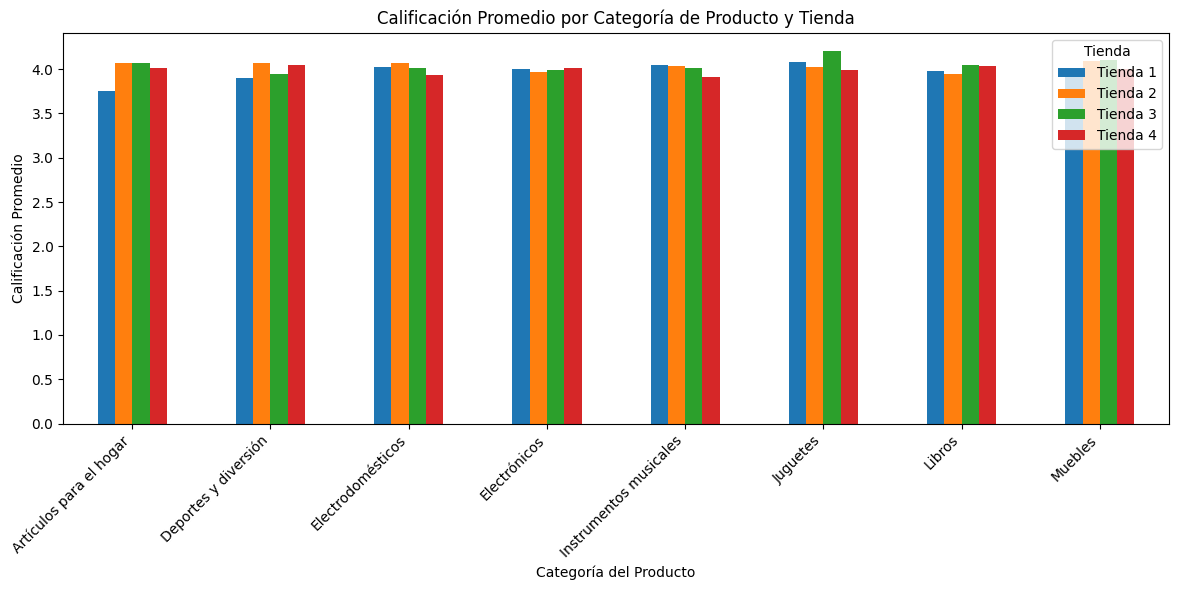

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define las URLs de los archivos CSV
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Leer los archivos CSV y agregar columna de tienda
datos = []
for url, tienda in zip(urls, nombres_tiendas):
    df = pd.read_csv(url)
    df['Tienda'] = tienda
    datos.append(df)
datos = pd.concat(datos, ignore_index=True)

# Asegurarse de que la columna 'Calificación' sea float
datos['Calificación'] = datos['Calificación'].astype(float).round(2)

# Agrupar por Tienda y Categoría del Producto y calcular calificación promedio
calif_categoria = datos.groupby(['Tienda', 'Categoría del Producto'], as_index=False)['Calificación'].mean()
calif_categoria['Calificación'] = calif_categoria['Calificación'].round(2)

# Pivotear para formato de tabla: filas=categoría, columnas=tienda, valores=calificación promedio
tabla = calif_categoria.pivot(index='Categoría del Producto', columns='Tienda', values='Calificación')

print(tabla)

# Graficar
tabla.plot(kind='bar', figsize=(12, 6))
plt.ylabel('Calificación Promedio')
plt.title('Calificación Promedio por Categoría de Producto y Tienda')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()

# VENDEDOR : Ventas Totales y Calificación

Tienda                   Tienda 1  Tienda 2  Tienda 3  Tienda 4
Categoría del Producto                                         
Electrónicos                 4.00      3.97      3.99      4.01
Electrodomésticos            4.03      4.07      4.01      3.93
Muebles                      3.95      4.09      4.10      4.00
Instrumentos musicales       4.05      4.04      4.01      3.91
Deportes y diversión         3.90      4.07      3.94      4.05
Juguetes                     4.08      4.03      4.20      3.99
Artículos para el hogar      3.75      4.07      4.07      4.01
Libros                       3.98      3.95      4.05      4.04
Tienda                      Tienda 1     Tienda 2     Tienda 3     Tienda 4
Categoría del Producto                                                     
Electrónicos             429493500.0  410831100.0  410775800.0  409476100.0
Electrodomésticos        363685200.0  348567800.0  329237900.0  283260200.0
Muebles                  187633700.0  176426300.0  20107

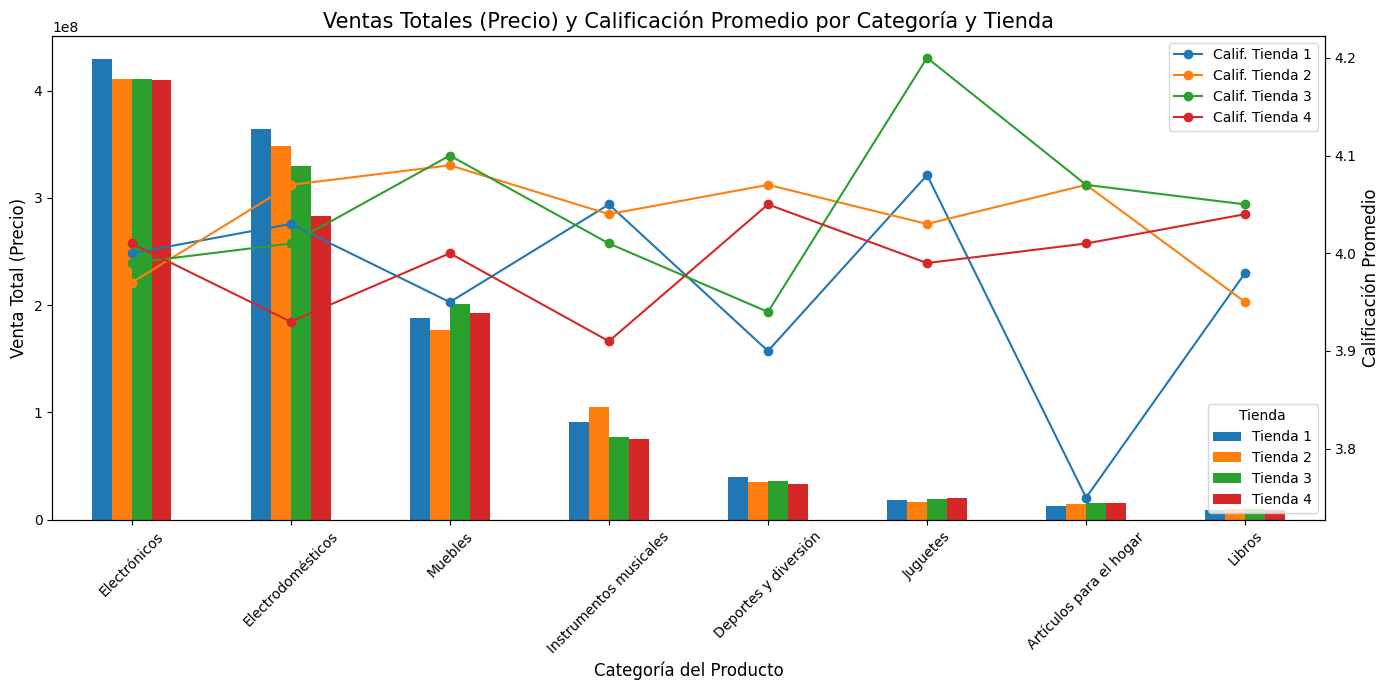

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define las URLs de los archivos CSV
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Leer los archivos CSV y agregar columna de tienda
datos = []
for url, tienda in zip(urls, nombres_tiendas):
    df = pd.read_csv(url)
    df['Tienda'] = tienda
    datos.append(df)
datos = pd.concat(datos, ignore_index=True)

# Asegurarse de que la columna 'Calificación' sea float
datos['Calificación'] = datos['Calificación'].astype(float).round(2)

# Agrupar por Tienda y Categoría del Producto
agrupado = datos.groupby(['Tienda', 'Categoría del Producto'], as_index=False).agg({
    'Precio': 'sum',
    'Calificación': 'mean'
})
agrupado['Calificación'] = agrupado['Calificación'].round(2)

# Calcular el total de ventas por categoría para ordenar DESCENDENTE
total_ventas_categoria = agrupado.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)
categorias_ordenadas = total_ventas_categoria.index.tolist()

# Pivotear para formato de tabla: filas=categoría, columnas=tienda, ordenando categorías
tabla_precios = agrupado.pivot(index='Categoría del Producto', columns='Tienda', values='Precio').loc[categorias_ordenadas]
tabla_calif = agrupado.pivot(index='Categoría del Producto', columns='Tienda', values='Calificación').loc[categorias_ordenadas]

# Mostrar el DataFrame
print(tabla_calif)
print(tabla_precios)

# Graficar
fig, ax1 = plt.subplots(figsize=(14, 7))

# Barras para los totales de Precio por tienda
tabla_precios.plot(kind='bar', ax=ax1)
ax1.set_ylabel('Venta Total (Precio)', fontsize=12)
ax1.set_xlabel('Categoría del Producto', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.legend(title='Tienda', loc='lower right')#UBICACION LEGENDA

# Eje secundario para calificaciones promedio
ax2 = ax1.twinx()
for tienda in nombres_tiendas:
    ax2.plot(tabla_calif.index, tabla_calif[tienda], marker='o', label=f'Calif. {tienda}')
ax2.set_ylabel('Calificación Promedio', fontsize=12)
ax2.legend(loc='upper right')

plt.title('Ventas Totales (Precio) y Calificación Promedio por Categoría y Tienda', fontsize=15)
plt.tight_layout()
plt.show()

           Vendedor  Suma de Precios  Calificación Promedio
3     Felipe Santos      353796000.0                   4.08
4   Izabela de León      350342400.0                   3.86
8     Maria Alfonso      349694800.0                   3.96
6     Juliana Costa      338364700.0                   3.92
10      Pedro Gomez      313350900.0                   4.04
11    Rafael Acosta      310292300.0                   4.06
5    Juan Fernandez      308562100.0                   4.03
7     Lucas Olivera      305403600.0                   3.96
2     Camila Rivera      303184200.0                   4.03
0   Beatriz Morales      302695600.0                   4.05
1    Blanca Ramirez      299586600.0                   3.99
12   Santiago Silva      293418200.0                   4.03
13  Ángel Rodriguez      291625200.0                   4.13
9   Mariana Herrera      283302600.0                   4.07


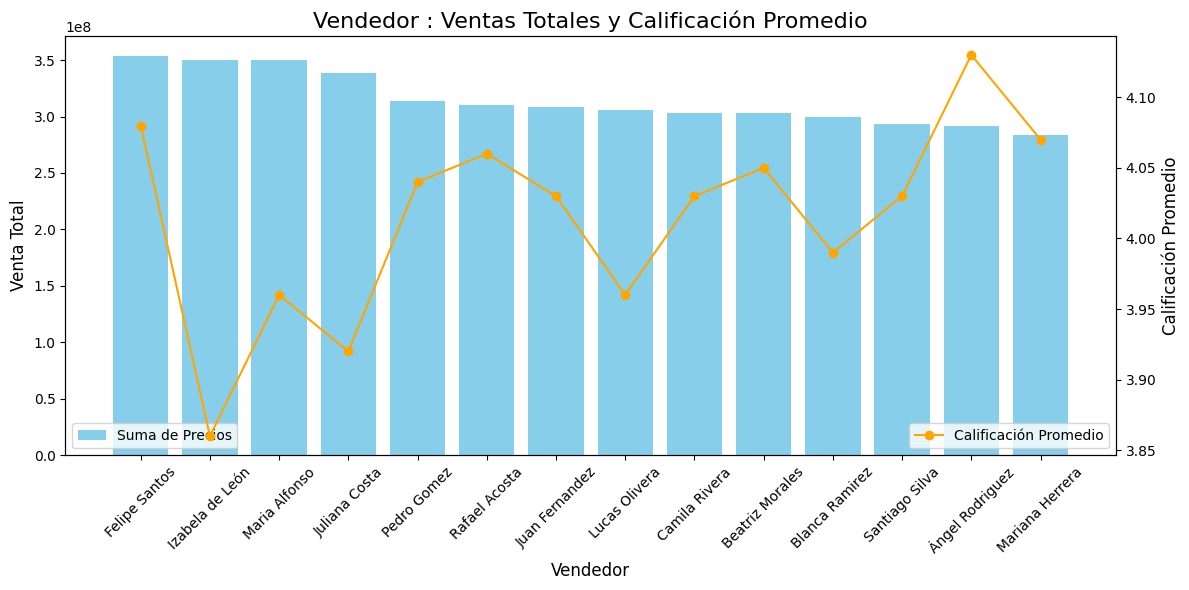

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define las URLs de los archivos CSV
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Leer los archivos CSV
tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Concatenar los datos de todas las tiendas
datos = pd.concat([tienda1, tienda2, tienda3, tienda4])

# Asegurarse de que la columna 'calificacion' sea de tipo float
datos['Calificación'] = datos['Calificación'].astype(float).round(2)

# Agrupar por vendedor y calcular la suma de precios y calificación promedio
ventas_por_vendedor = datos.groupby('Vendedor', as_index=False).agg({
    'Precio': 'sum',  # Asegúrate de que la columna se llame 'Precio'
    'Calificación': 'mean'  # Asegúrate de que la columna se llame 'Calificación'
})

# Renombrar las columnas
ventas_por_vendedor.rename(columns={
    'Precio': 'Suma de Precios',
    'Calificación': 'Calificación Promedio'
}, inplace=True)

# Redondear la columna 'Calificación Promedio' a 2 decimales
ventas_por_vendedor['Calificación Promedio'] = ventas_por_vendedor['Calificación Promedio'].round(2)

# Ordenar de mayor a menor por la suma de precios
ventas_por_vendedor = ventas_por_vendedor.sort_values(by='Suma de Precios', ascending=False)

# Mostrar el DataFrame
print(ventas_por_vendedor)

# Crear un gráfico de barras con dos colores
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de barras para la suma de precios
ax1.bar(ventas_por_vendedor['Vendedor'], ventas_por_vendedor['Suma de Precios'], color='skyblue', label='Suma de Precios')
ax1.set_ylabel('Venta Total', fontsize=12)
ax1.set_xlabel('Vendedor', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc='lower left')

# Crear un segundo eje Y para las calificaciones promedio
ax2 = ax1.twinx()
ax2.plot(ventas_por_vendedor['Vendedor'], ventas_por_vendedor['Calificación Promedio'], color='orange', marker='o', label='Calificación Promedio')
ax2.set_ylabel('Calificación Promedio', fontsize=12)
ax2.legend(loc='lower right')

# Título del gráfico
plt.title('Vendedor : Ventas Totales y Calificación Promedio', fontsize=16)

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#Ventas Totales por Vendedor

           Vendedor  Venta Total
3     Felipe Santos  353796000.0
4   Izabela de León  350342400.0
8     Maria Alfonso  349694800.0
6     Juliana Costa  338364700.0
10      Pedro Gomez  313350900.0
11    Rafael Acosta  310292300.0
5    Juan Fernandez  308562100.0
7     Lucas Olivera  305403600.0
2     Camila Rivera  303184200.0
0   Beatriz Morales  302695600.0
1    Blanca Ramirez  299586600.0
12   Santiago Silva  293418200.0
13  Ángel Rodriguez  291625200.0
9   Mariana Herrera  283302600.0


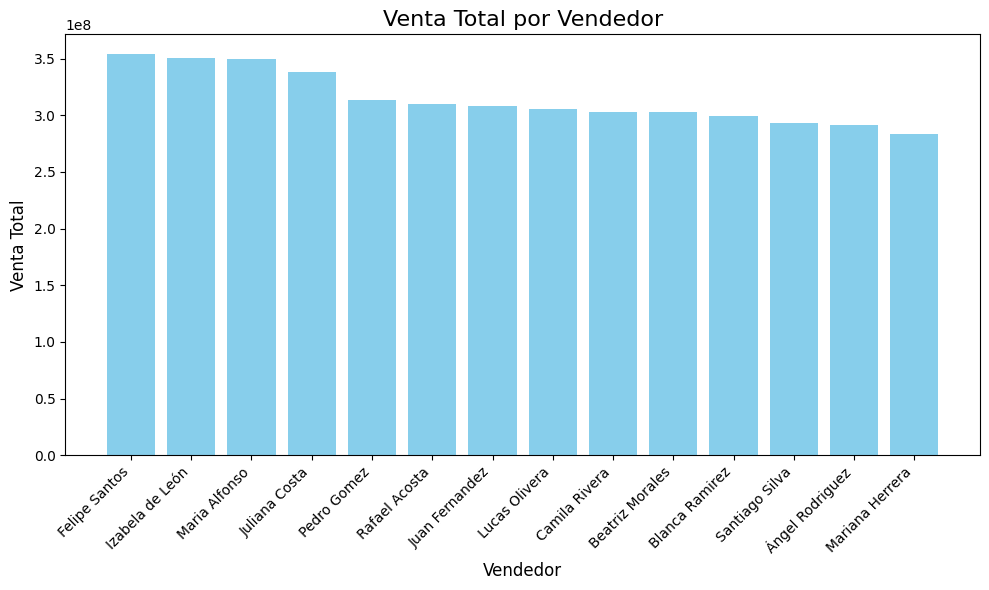

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define las URLs de los archivos CSV
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Leer los archivos CSV
tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Agregar una columna para identificar la tienda
tienda1["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

# Concatenar los datos de todas las tiendas
datos = pd.concat([tienda1, tienda2, tienda3, tienda4])

# Agrupar por vendedor y calcular la suma de precios
ventas_por_vendedor = datos.groupby('Vendedor', as_index=False).agg({'Precio': 'sum'})

# Renombrar las columnas
ventas_por_vendedor.rename(columns={
    'Precio': 'Venta Total',
    'Calificación': 'Calificación Promedio'
}, inplace=True)

# Ordenar de mayor a menor por la suma de precios
ventas_por_vendedor = ventas_por_vendedor.sort_values(by='Venta Total', ascending=False)

# Mostrar el DataFrame
print(ventas_por_vendedor)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(ventas_por_vendedor['Vendedor'], ventas_por_vendedor['Venta Total'], color='skyblue')
plt.title('Venta Total por Vendedor', fontsize=16)
plt.xlabel('Vendedor', fontsize=12)
plt.ylabel('Venta Total', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# CONSUMOS DE PRODUCTOS

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define las URLs de los archivos CSV
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Leer los archivos CSV
tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Agregar una columna para identificar la tienda
tienda1["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

# Concatenar los datos de todas las tiendas
datos = pd.concat([tienda1, tienda2, tienda3, tienda4])

# TASA DE CRECIMIENTO TRIMESTRAL POR TIENDA

## OTRO CODIGO VENTAS TRIMESTRALES POR TIENDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# URLs de los archivos CSV
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
]

# Leer y procesar los datos
tiendas = []
for i, url in enumerate(urls, 1):
    df = pd.read_csv(url)
    df['Tienda'] = f'Tienda_{i}'
    tiendas.append(df)

# Concatenar los DataFrames
df_tiendas = pd.concat(tiendas, ignore_index=True)

# Procesar fechas y crear columna de trimestre
df_tiendas["Fecha de Compra"] = pd.to_datetime(df_tiendas["Fecha de Compra"], dayfirst=True)
df_tiendas["Año"] = df_tiendas["Fecha de Compra"].dt.year
df_tiendas["Trimestre"] = df_tiendas["Fecha de Compra"].dt.to_period("Q").astype(str).str.replace('Q', 'T')#REEMPLAZO DE Quarter "Q" en inglés POR  trimestre)


# Agrupar por Tienda y Trimestre, sumar ventas
ventas_trim = df_tiendas.groupby(["Tienda", "Trimestre"])["Precio"].sum().reset_index()

# Pivotear para mostrar tiendas como filas y trimestres como columnas (en millones)
tabla_trim = ventas_trim.pivot(index="Tienda", columns="Trimestre", values="Precio").fillna(0) / 1000000

# Agregar columna de Total General
tabla_trim["Total General"] = tabla_trim.sum(axis=1)

# Redondear a 3 decimales
tabla_trim = tabla_trim.round(3)

# Mostrar en formato markdown
print(tabla_trim.to_markdown())

| Tienda   |   2020T1 |   2020T2 |   2020T3 |   2020T4 |   2021T1 |   2021T2 |   2021T3 |   2021T4 |   2022T1 |   2022T2 |   2022T3 |   2022T4 |   2023T1 |   Total General |
|:---------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|----------------:|
| Tienda_1 |  104.701 |   98.546 |   96.456 |   69.231 |   87.52  |   81.25  |  116.319 |   77.032 |   79.4   |   72.467 |   92.158 |   72.541 |  103.261 |         1150.88 |
| Tienda_2 |   79.034 |   79.165 |   78.149 |   84.119 |   81.104 |   83.675 |   96.566 |   89.87  |   87.642 |   93.087 |   85.611 |   91.886 |   86.435 |         1116.34 |
| Tienda_3 |   81.384 |   78.932 |   86.147 |   75.245 |   70.893 |   83.439 |   75.571 |  133.052 |   89.283 |   85.688 |   87.881 |   87.586 |   62.919 |         1098.02 |
| Tienda_4 |   70.712 |   98.337 |   86.332 |   75.466 |   92.485 |   77.483 |   92.198 |   85.659 |   97.892 |   64.332 |   72.65

# TASA CRECIMIENTO TRIMESTRAL

| Tienda   |   2020T1 |   2020T2 |   2020T3 |   2020T4 |   2021T1 |   2021T2 |   2021T3 |   2021T4 |   2022T1 |   2022T2 |   2022T3 |   2022T4 |   2023T1 |
|:---------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
| Tienda_1 |   104.7  |    98.55 |    96.46 |    69.23 |    87.52 |    81.25 |   116.32 |    77.03 |    79.4  |    72.47 |    92.16 |    72.54 |   103.26 |
| Tienda_2 |    79.03 |    79.17 |    78.15 |    84.12 |    81.1  |    83.67 |    96.57 |    89.87 |    87.64 |    93.09 |    85.61 |    91.89 |    86.43 |
| Tienda_3 |    81.38 |    78.93 |    86.15 |    75.24 |    70.89 |    83.44 |    75.57 |   133.05 |    89.28 |    85.69 |    87.88 |    87.59 |    62.92 |
| Tienda_4 |    70.71 |    98.34 |    86.33 |    75.47 |    92.48 |    77.48 |    92.2  |    85.66 |    97.89 |    64.33 |    72.66 |    67.34 |    57.48 |


<Figure size 1600x800 with 0 Axes>

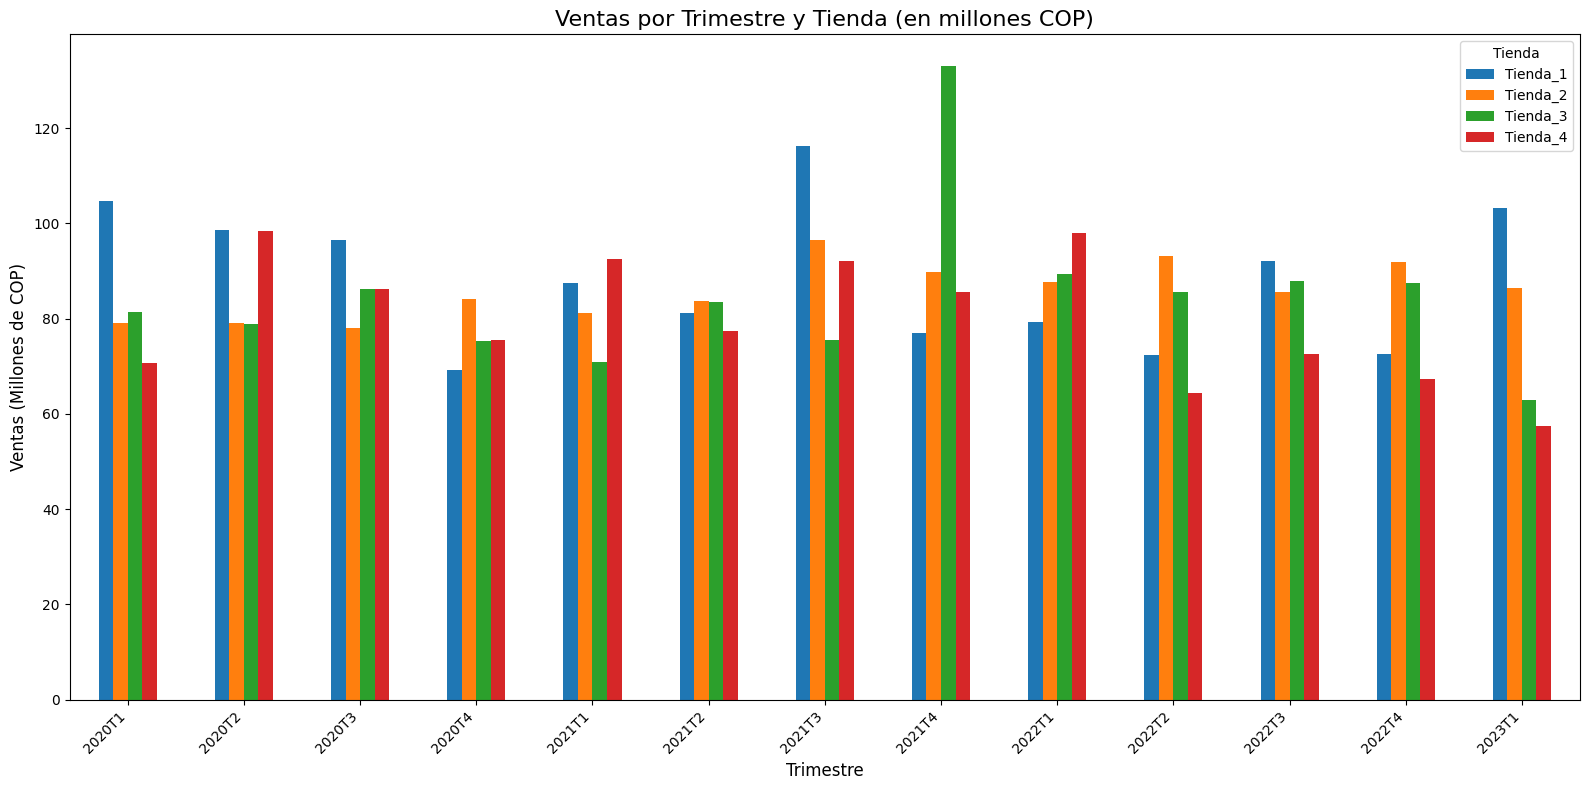

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# URLs de los archivos CSV
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
]

# Leer y procesar los datos
tiendas = []
for i, url in enumerate(urls, 1):
    df = pd.read_csv(url)
    df['Tienda'] = f'Tienda_{i}'
    tiendas.append(df)

datos = pd.concat(tiendas, ignore_index=True)

# Procesamiento de fechas
datos['Fecha de Compra'] = pd.to_datetime(datos['Fecha de Compra'], dayfirst=True)
datos['Año'] = datos['Fecha de Compra'].dt.year
datos['Trimestre'] = datos['Fecha de Compra'].dt.to_period('Q').astype(str).str.replace('Q', 'T')
datos['Periodo'] = datos['Año'].astype(str) + ' ' + datos['Trimestre']

# Filtrar datos
datos_filtrados = datos[(datos['Año'] >= 2020) & (datos['Año'] <= 2023)].copy()

# Calcular ventas por trimestre y tienda
ventas_por_trimestre = (datos_filtrados.groupby(['Tienda', 'Trimestre', 'Año'])
                        .agg({'Precio': 'sum'})
                        .reset_index()
                        .sort_values(['Tienda', 'Año', 'Trimestre']))

# Pivotear para mostrar tiendas como filas y trimestres como columnas (en millones)
tabla_ventas = ventas_por_trimestre.pivot(index="Tienda", columns="Trimestre", values="Precio").fillna(0) / 1_000_000

# Mostrar tabla resumen MARKDOWN Y SIN INDEX
print(tabla_ventas.round(2).to_markdown())

# --- GRÁFICO DE BARRAS AGRUPADAS ---
plt.figure(figsize=(16, 8))
tabla_ventas.T.plot(kind='bar', figsize=(16, 8))
plt.title('Ventas por Trimestre y Tienda (en millones COP)', fontsize=16)
plt.xlabel('Trimestre', fontsize=12)
plt.ylabel('Ventas (Millones de COP)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()

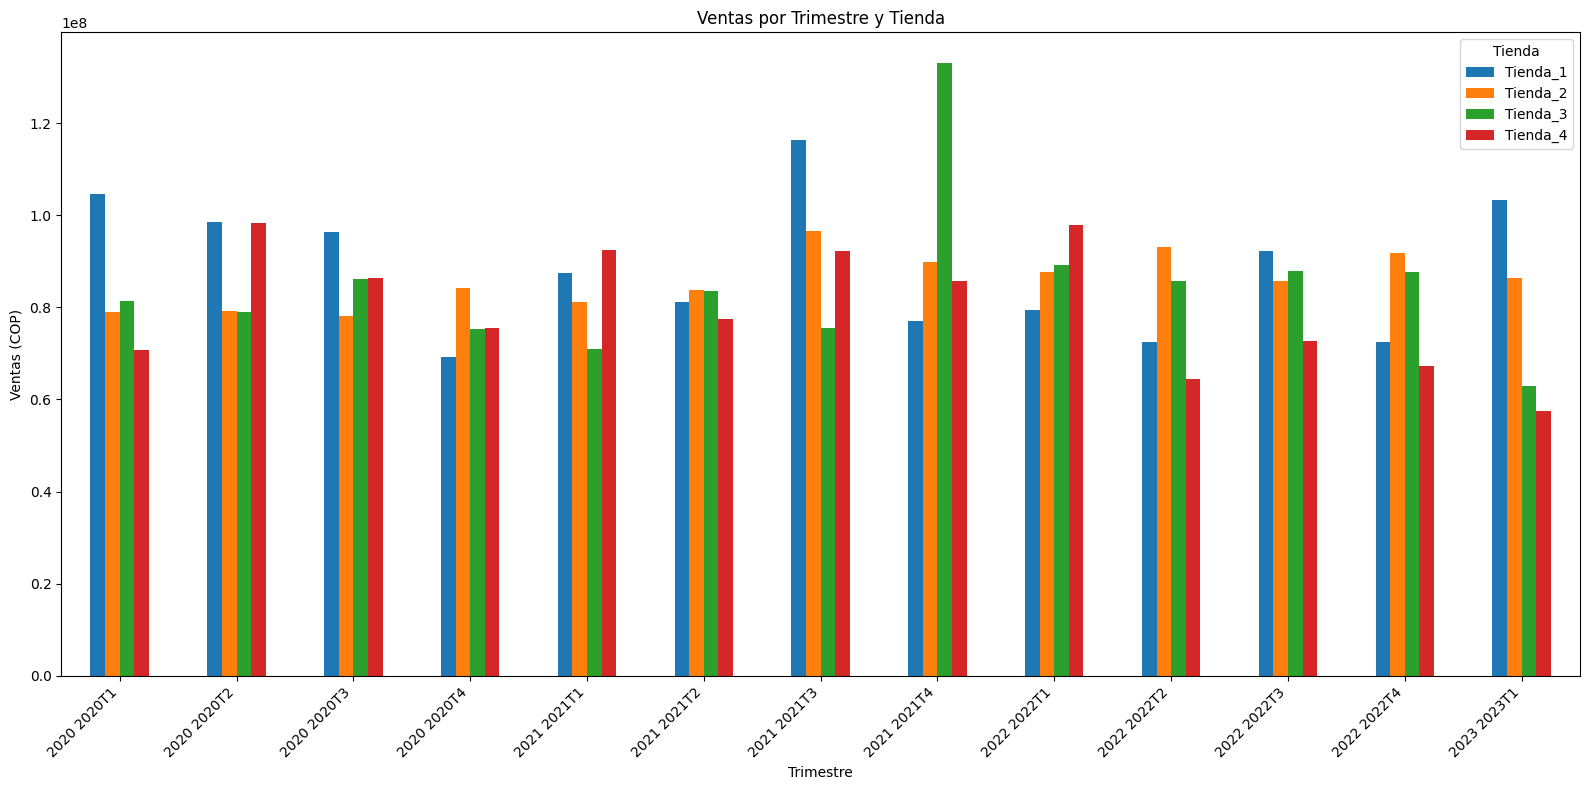

In [ ]:
Totimport pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# URLs de los archivos CSV
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
]

# Leer y procesar los datos
tiendas = []
for i, url in enumerate(urls, 1):
    df = pd.read_csv(url)
    df['Tienda'] = f'Tienda_{i}'
    tiendas.append(df)

datos = pd.concat(tiendas, ignore_index=True)

# Procesamiento de fechas y trimestre
datos['Fecha de Compra'] = pd.to_datetime(datos['Fecha de Compra'], dayfirst=True)
datos['Año'] = datos['Fecha de Compra'].dt.year
datos['Trimestre'] = datos['Fecha de Compra'].dt.to_period('Q').astype(str).str.replace('Q', 'T')
datos['Periodo'] = datos['Año'].astype(str) + ' ' + datos['Trimestre']

# Filtrar datos relevantes
datos_filtrados = datos[(datos['Año'] >= 2020) & (datos['Año'] <= 2023)].copy()

# Agrupar ventas por tienda y trimestre
ventas_por_trimestre = (datos_filtrados.groupby(['Periodo', 'Tienda'])
                        .agg({'Precio': 'sum'})
                        .reset_index())

# Pivotear para gráfico de barras agrupadas
pivot = ventas_por_trimestre.pivot(index='Periodo', columns='Tienda', values='Precio').fillna(0)

# Ordenar los periodos cronológicamente
pivot = pivot.sort_index()

# Gráfico de barras agrupadas
pivot.plot(kind='bar', figsize=(16, 8))
plt.title('Ventas por Trimestre y Tienda')
plt.xlabel('Trimestre')
plt.ylabel('Ventas (COP)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()

#VENTAS ACUMULADAS POR TRIMESTRE

| Tienda   | Periodo     |   Venta_Total |   Venta_Acumulada |
|:---------|:------------|--------------:|------------------:|
| Tienda 1 | 2020 2020T1 |      104.701  |       0.000104701 |
| Tienda 1 | 2020 2020T2 |       98.5457 |       0.000203246 |
| Tienda 1 | 2020 2020T3 |       96.4558 |       0.000299702 |
| Tienda 1 | 2020 2020T4 |       69.2311 |       0.000368933 |
| Tienda 1 | 2021 2021T1 |       87.5202 |       0.000456453 |
| Tienda 1 | 2021 2021T2 |       81.2495 |       0.000537703 |
| Tienda 1 | 2021 2021T3 |      116.319  |       0.000654022 |
| Tienda 1 | 2021 2021T4 |       77.0317 |       0.000731054 |
| Tienda 1 | 2022 2022T1 |       79.3999 |       0.000810454 |
| Tienda 1 | 2022 2022T2 |       72.4667 |       0.000882921 |
| Tienda 1 | 2022 2022T3 |       92.1584 |       0.000975079 |
| Tienda 1 | 2022 2022T4 |       72.5406 |       0.00104762  |
| Tienda 1 | 2023 2023T1 |      103.261  |       0.00115088  |
| Tienda 2 | 2020 2020T1 |       79.0342 |       7.9034

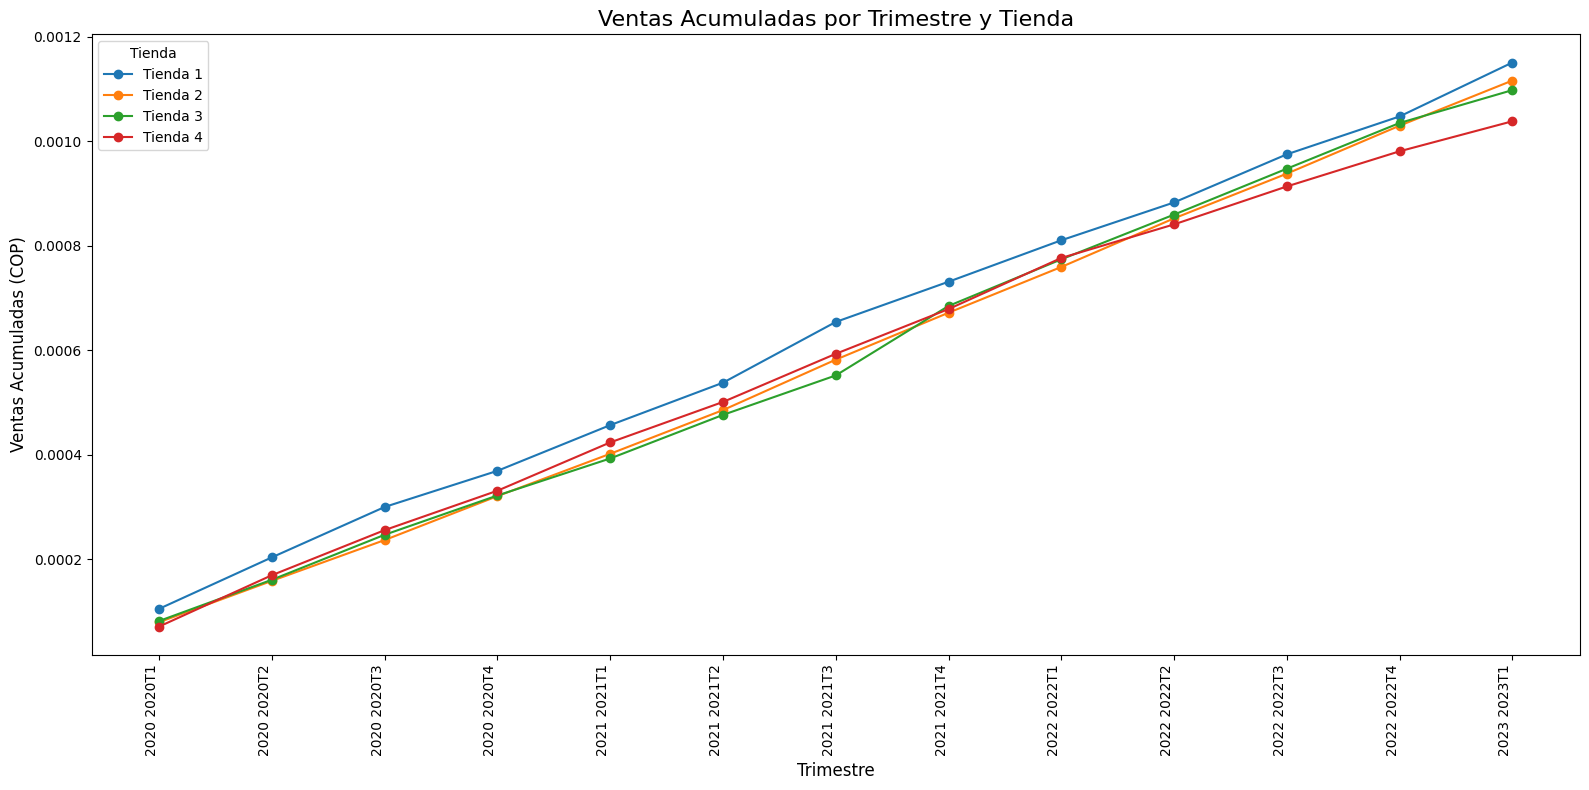

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# URLs de los archivos CSV
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
]

# Leer y procesar los datos
tiendas = []
for i, url in enumerate(urls, 1):
    df = pd.read_csv(url)
    df['Tienda'] = f'Tienda {i}'
    tiendas.append(df)

datos = pd.concat(tiendas, ignore_index=True)

# Procesamiento de fechas
datos['Fecha de Compra'] = pd.to_datetime(datos['Fecha de Compra'], dayfirst=True)
datos['Año'] = datos['Fecha de Compra'].dt.year
datos['Trimestre'] = datos['Fecha de Compra'].dt.to_period('Q').astype(str).str.replace('Q', 'T')
datos['Periodo'] = datos['Año'].astype(str) + ' ' + datos['Trimestre']

# Filtrar datos
datos_filtrados = datos[(datos['Año'] >= 2020) & (datos['Año'] <= 2023)].copy()

# Calcular ventas por trimestre y tienda
ventas_por_trimestre = (datos_filtrados.groupby(['Tienda', 'Año', 'Trimestre'])
                        .agg({'Precio': 'sum'})
                        .reset_index()
                        .sort_values(['Tienda', 'Año', 'Trimestre']))

# Reemplazar nombre columna "Precio" por "Venta_Total"
ventas_por_trimestre = ventas_por_trimestre.rename(columns=lambda x: x.replace("Precio", "Venta_Total"))

# Convertir Venta_Total a millones
ventas_por_trimestre['Venta_Total'] = ventas_por_trimestre['Venta_Total'] / 1_000_000

# Crear columna de periodo ordenado para el gráfico y la tabla
ventas_por_trimestre['Periodo'] = ventas_por_trimestre['Año'].astype(str) + ' ' + ventas_por_trimestre['Trimestre']

# Calcular ventas acumuladas por tienda
ventas_por_trimestre['Venta_Acumulada'] = ventas_por_trimestre.groupby('Tienda')['Venta_Total'].cumsum().fillna(0) / 1_000_000

# Mostrar tabla resumen en formato markdown y sin índice
print(ventas_por_trimestre[['Tienda', 'Periodo', 'Venta_Total', 'Venta_Acumulada']].to_markdown(index=False))

# --- GRÁFICO DE LÍNEAS DE VENTAS ACUMULADAS POR TRIMESTRE Y TIENDA ---
plt.figure(figsize=(16, 8))

for tienda in ventas_por_trimestre['Tienda'].unique():
    datos_tienda = ventas_por_trimestre[ventas_por_trimestre['Tienda'] == tienda]
    plt.plot(
        datos_tienda['Periodo'],
        datos_tienda['Venta_Acumulada'],
        marker='o',
        label=tienda
    )

plt.title('Ventas Acumuladas por Trimestre y Tienda', fontsize=16)
plt.xlabel('Trimestre', fontsize=12)
plt.ylabel('Ventas Acumuladas (COP)', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()